# Thinking 1 ：什么是反向传播中的链式法则

答：  
最终结果的误差是由前面几层神经网络传递而来，要想求得每一层的误差，就需要使用每一层后面一层的误差乘上导数，每一层都是如此，中间不可以中断，一直到第一层神经网络，会发现第一层神经网络权重的修正值是后面几层权重转置累乘与最终误差的乘积。

# Thinking 2 ： 请列举几种常见的激活函数，激活函数有什么作用

答：  
ReLU；Sigmoid；tanh，激活函数的作用是增加神经网络的非线性特征。

# Thinking 3 ：利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？

答：  
1. 权重未更新 -->> 使用SGD, Adam 等优化方法对去权重进行更新。
2. 梯度消失，权重每次更新的幅度太小 -->> 更换激活函数，使用 ReLU 避免发生梯度消失现象。
3. 使用梯度下降时，学习率 Learning rate 太小，每次更新参数都不明显 -->> 使用Adam 自适应更新参数。

# Action 1 :使用Pytorch编写神经网络，完成boston房价预测问题
>1）数据加载：from sklearn.datasets import load_boston  
2）网络结构：  
l1 = Linear(X, W1, b1)  
s1 = Relu(l1)  
l2 = Linear(s1, W2, b2)  
cost = MSE(y, l2)   
隐藏层维度为10  

# 一、使用 Numpy (使用 BGD 优化)

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

#加载数据
data = load_boston()
target = data.target
data = data.data
# print(data.shape)

#数据标准化
# ss = StandardScaler
# X_2 = ss(data).copy
X_ = data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)


# 目标值维度转换
y_ = target.reshape(target.shape[0], 1)
# print(y_.shape)
x_train, x_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.25, random_state = 33)

#定义输入变量
X = x_train
y = y_train

import numpy as np
#定义维度
n, d_in, d_hidden, d_out = x_train.shape[0], x_train.shape[1], 16, 1
def linear(X, W, b):
    result = X.dot(W) + b
    return result

def Relu(y):
    return np.where(y < 0, 0, y)

def loss(y, y_pre):
    return np.mean(np.square(y - y_pre))
    
#构建两层神经网络 W1，b1  W2，b2  Relu 
def init_net():
    #初始化神经网络
    np.random.seed(33)
    W1 = np.random.randn(d_in, d_hidden)
    b1 = np.random.randn(d_hidden)
    W2 = np.random.randn(d_hidden, d_out)
    b2 = np.random.randn(d_out)
    return W1,W2,b1,b2
    
def forward(X, W1, W2, b1, b2):
    #线性层
    y1 = linear(X, W1, b1)
    ReLU = Relu(y1)
    y2 = linear(ReLU, W2, b2)
    return y1, ReLU, y2

#定义神经网络，返回值为权重
def NPnet(X, y, learning_rate = 1e-5, iter_num = 5000):
    W1, W2, b1, b2 = init_net()
    loss_temp = 0.0
    for i in range(iter_num):
        y1, ReLU, y_pre = forward(X, W1, W2, b1, b2)
        mse_loss = loss(y, y_pre)
        #print(mse_loss)
        #print(loss_temp)
        #早停法
        if (i > 0 and (np.abs(mse_loss - loss_temp) < 1e-10)) or (i == iter_num - 1):
            #print(mse_loss - loss_temp < 1e-10)
            return W1, W2, b1, b2, y_pre, i
        
        loss_temp = mse_loss.copy()
        # print(np.mean(y_pre - y))
        #输出层梯度
        grad_y_pre = 2.0 * (y_pre - y)
        #print(grad_y_pre.shape)
        #print(grad_y_pre)
        
        # W2 梯度更新
        grad_W2 = ReLU.T.dot(grad_y_pre)
        grad_b2 = grad_y_pre.sum(axis = 0)
        
        # 第二层(W2) 传递到的 Loss 值
        loss_W2 = grad_y_pre.dot(W2.T)
        #print(grad_Relu.shape)
        #print(y1.shape)
        #print(grad_W2.shape)
        #print(W2.shape)

        # ReLU 层梯度更新
        loss_ReLU = loss_W2.copy()
        loss_ReLU[y1 < 0] = 0
        
        #print(loss_ReLU)
        #print(loss_W2)
        
        # W1 更新权重
        #print(X)
        grad_W1 = X.T.dot(loss_ReLU)
        #print(grad_W1)
        grad_b1 = loss_ReLU.sum(axis = 0)
        #print(grad_b1.shape)
        W1 -= learning_rate * grad_W1
        
        # 更新 W2 
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2
        #print(W2)
        b1 -= learning_rate * grad_b1
        #print(W1)
        

W1, W2, b1, b2, y_hat, i = NPnet(X, y)
print("W1:\n", W1)
print("W2:\n", W2)
# print(y)
# print(y_pre.reshape(1,y_pre.shape[0]))
# print(grad_y_pre)
# print(i)
# print(loss(y, y_hat))

y1, ReLU, y_pre = forward(x_test, W1, W2, b1, b2)
# print(y_pre, y_pre.shape)
print("MSE = {}".format(loss(y_test, y_pre)))

W1:
 [[ 4.60356869e-01 -1.53199023e+00 -1.59860248e+00 -5.24377603e-01
   1.56953777e-01  1.17024836e+00 -2.57409734e-01  1.04251780e+00
  -3.57124895e-01  3.84586059e-01 -5.27868979e-01 -8.16054582e-01
  -6.42512810e-01  3.64150817e-01 -1.17206429e+00 -2.06433198e+00]
 [-1.07408569e+00  1.12234293e+00 -8.23750680e-01  5.49637220e-01
   1.13567292e+00  7.44743607e-01 -2.22452963e+00 -2.24000088e-01
  -6.37504574e-01 -4.54058795e-01 -7.33122863e-01  3.41927116e-01
   8.91042451e-01 -7.36156525e-01 -1.23111841e+00 -8.63705200e-01]
 [ 1.27801219e+00  3.84091231e-01 -8.33583288e-01  5.30926906e-01
  -3.48377188e-01 -4.74753000e-01 -6.29172584e-01  9.14809573e-02
  -2.58940048e-01  7.05577955e-01  3.86551121e-01 -4.73106507e-01
  -9.40843835e-01  2.58882823e-01 -1.07338185e+00 -4.26696606e-01]
 [-2.51740430e-01  1.27160351e+00 -8.94590546e-01 -1.91210710e+00
   1.56786245e+00  2.18709786e-01 -5.13801092e-01  5.55945420e-01
  -1.01576823e+00  7.48400869e-01  2.15906380e+00 -8.36850662e-01
  

# 使用Numpy 构造的神经网络学习率太大时容易溢出，且梯度下降法不如 Adam 的优化方式，不容易调试

# 二、使用 pytorch

torch.Size([506, 13])
torch.Size([506, 1])


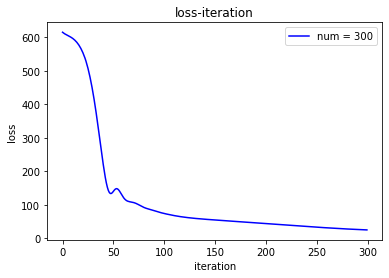

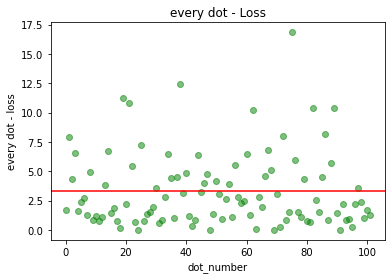

In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import torch

#加载数据
data = load_boston()
target = data.target
data = data.data
# print(data.shape)

#数据标准化
# ss = StandardScaler
# X_2 = ss(data).copy
# X_ = data
# X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
ss = MinMaxScaler()
X = ss.fit_transform(data)
X = torch.from_numpy(X).type(torch.FloatTensor)
print(X.shape)

# 目标值维度转换
y = target.reshape(target.shape[0], 1)
y = torch.from_numpy(y).type(torch.FloatTensor)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)


from torch import nn

model = nn.Sequential(
        nn.Linear(13, 20),
        nn.ReLU(),
        nn.Linear(20, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

#定义优化器和损失函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

#训练
max_epoch = 300
loss_list = []
for i in range(max_epoch):
    #前向传播
    y_pred = model(x_train)
    # print(y_pred.shape, y_train.shape)
    # 计算 Loss
    loss = criterion(y_pred, y_train)
    # print(i, loss.item())
    loss_list.append(loss)
    
    #首先进行梯度清零
    optimizer.zero_grad()
    #梯度清空要在反向传播之前。。。不要犯错
    
    #反向传播
    loss.backward()
    
    #权重调整
    optimizer.step()

    
#测试
y_pre = model(x_test)
y_pre_list = y_pre.detach().numpy()
#print(y_pre_list)

#绘制 loss 的曲线
from matplotlib import pyplot as plt
fig1 = plt.figure(6*9)
X = np.arange(0, 300, 1)
y = loss_list
plt.plot(X, y, color = 'blue')
plt.legend(['num = 300'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss-iteration')
plt.show()

#查看真是至于预测值的散点图
fig2 = plt.figure(6*9)
x = np.arange(x_test.shape[0])
y1 = np.array(y_pre_list)
y2 = np.array(y_test)
y = np.abs(y1 - y2)
ave = np.mean(y)
# p1 = plt.scatter(x, y1, color = 'red', alpha = 0.8)
p2 = plt.scatter(x, y, color = 'green', alpha = 0.5)
pa = plt.axhline(y = ave, color="red")
plt.title('every dot - Loss')
plt.xlabel('dot_number')
plt.ylabel('every dot - loss')
plt.show()

#  Action 2: 对移动推荐系统进行可视化数据探索
>数据集https://tianchi.aliyun.com/competition/entrance/231522/information\ntianchi_fresh_comp_train_item.csv\ntianchi_fresh_comp_train_user.csv  
比如时间规律统计，4种行为类别的对比…  

# 使用 colab 全数据集进行可视化探索

```python
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/fresh_comp_offline/")

#数据读取
users_data = pd.read_csv("tianchi_fresh_comp_train_user.csv")
items_data = pd.read_csv("tianchi_fresh_comp_train_item.csv")
users_data.head()
items_data.head()
result_sample = pd.read_csv("result_sample.csv")
result_sample
```
## 1. 用户购买商品的数据集，自然存在先浏览再购买，因此看一下所有用户的CVR（购买转化率）的大小
```python
#计算CVR (购买转化率)
user_behavior = users_data['behavior_type'].value_counts()
count_all = user_behavior.sum()
CVR = user_behavior[4] / count_all
print('CVR:{}%'.format(CVR * 100))
```
CVR:0.9985776926023916%

## 2. 探索那一天的用户行为最多 
```python
import numpy as np
# 转化时间
# 将 time 字段设置为 pandas 中的 datetime 类型
pd.set_option('display.max_columns', 100)
users_data['time'] = pd.to_datetime(users_data['time'])
users_data_copy = users_data.copy()
users_data_copy.index = users_data_copy['time']
print(users_data_copy)
print(type(users_data_copy))
from collections import defaultdict
from datetime import datetime, timedelta
def count_day(users_data_copy):
    count_day = defaultdict(int)
    # 从2014-11-17 到 2014-12-18
    start = '2014-11-17'
    temp_date = datetime.strptime(start,'%Y-%m-%d')
    delta = timedelta(days = 1)
    for i in range(31):
        temp_date = temp_date + delta
        #将时间转化为字符串
        temp_str = temp_date.strftime('%Y-%m-%d')
        count_day[temp_str] += (users_data_copy.loc[temp_str].shape[0])
    # print(temp_date)
    return count_day
count_day = count_day(users_data_copy)
print(count_day)

```
{ 2014-11-25': 699413, '2014-11-26': 679323, '2014-11-27': 689855, '2014-11-28': 658806, '2014-11-29': 684442, '2014-11-30': 751093, '2014-12-01': 744363, '2014-12-02': 753810, '2014-12-03': 788689, '2014-12-04': 745391, '2014-12-05': 693593, '2014-12-06': 732821, '2014-12-07': 763498, '2014-12-08': 753138, '2014-12-09': 767838, '2014-12-10': 788712, '2014-12-11': 944979, '2014-12-12': 1344980, '2014-12-13': 777013, '2014-12-14': 779285, '2014-12-15': 764085, '2014-12-16': 751370, '2014-12-17': 734520, '2014-12-18': 711839})

```python
import matplotlib.pyplot as plt
fig = plt.figure(6*15)
df_count_day = pd.DataFrame.from_dict(count_day, orient = 'index', columns = ['count'])
df_count_day['count'].plot(kind = 'bar')
plt.legend(loc = 'best')
plt.grid(True)
plt.title('everyday user count')
plt.savefig('everyday user count')
plt.show()

```
![tu1.png](tu1.png)

## 注意： 双 12 这一天相当于一个离群值

## 3. 探索给定商品子集，每天被操作商品子集的个数
```python
#属于商品子集的操作次数
items_data
items_df = pd.merge(users_data, items_data, on = ['item_id']).set_index('time')
pd.set_option('display.max_columns', 100)
print(items_df.shape)
print(items_df.head())
from collections import defaultdict
items_count_day = defaultdict(int)
# 从2014-11-17 到 2014-12-18
start = '2014-11-17'
temp_date = datetime.strptime(start,'%Y-%m-%d')
delta = timedelta(days = 1)
for i in range(31):
    temp_date = temp_date + delta
    #将时间转化为字符串
    temp_str = temp_date.strftime('%Y-%m-%d')
    items_count_day[temp_str] += (items_df.loc[temp_str].shape[0])
    # print(temp_date)
print(items_count_day)
fig2 = plt.figure(6*15)
df_count_day = pd.DataFrame.from_dict(items_count_day, orient = 'index', columns = ['count'])
df_count_day['count'].plot(kind = 'bar')
plt.legend(loc = 'best')
plt.grid(True)
plt.title('everyday user count on such items')
plt.savefig('everyday user count on such items')
plt.show()
```
{'2014-11-18': 86732, '2014-11-19': 94513, '2014-11-20': 90008, '2014-11-21': 81061, '2014-11-22': 121133, '2014-11-23': 157253, '2014-11-24': 113969, '2014-11-25': 106101, '2014-11-26': 103857, '2014-11-27': 91260, '2014-11-28': 135652, '2014-11-29': 127997, '2014-11-30': 117067, '2014-12-01': 104922, '2014-12-02': 134609, '2014-12-03': 144284, '2014-12-04': 103145, '2014-12-05': 114820, '2014-12-06': 138450, '2014-12-07': 129833, '2014-12-08': 157222, '2014-12-09': 204471, '2014-12-10': 149494, '2014-12-11': 225812, '2014-12-12': 422308, '2014-12-13': 120220, '2014-12-14': 130784, '2014-12-15': 156657, '2014-12-16': 130437, '2014-12-17': 155796, '2014-12-18': 130095}

![tu2.png](tu2.png)

## 全量数据集反映出 双12 仍为离群值，备货量最多，与分块相比不一样的结论

## 4. 对双12 这一天，探索每一个小时中，四种行为的分布

```python
def show_count_hour(date1):
    count_hour = {}
    for i in range(24):
        time_str = date1 + ' %02.d' %i
        count_hour[time_str] = [0, 0, 0, 0]
        temp = items_df.loc[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j] - 1] += temp[temp.index[j]]
        print(count_hour)
    return count_hour

count_hour = show_count_hour('2014-12-12')

#可视化
fig3 = plt.figure(12*24)
df_count_hour = pd.DataFrame.from_dict(count_hour, orient = 'index')
df_count_hour.plot(kind = 'bar')
plt.legend(loc = 'best')
plt.grid(True)
plt.savefig('12-12 every hour count')
plt.show()

```

![tu3.png](tu3.png)

# 本章任务

In [1]:
import xlrd
data = xlrd.open_workbook('L7自测文档.xls')
#通过索引顺序获取
table = data.sheet_by_index(0)

""" 工作表中行/列的操作 """
#获取该sheet中的有效行数
nrows = table.nrows  
print(nrows)
row_index, col_index = 0, 0
# 获取某行信息
for row_index in range(2, nrows-6):
    print(table.row(row_index)[:2])
for row_index in range(nrows-5, nrows):
    print(table.row(row_index)[:2], table.row(row_index)[-2])

22
[text:'原理', text:'神经网络结构']
[text:'原理', text:'激活函数']
[text:'原理', text:'损失函数']
[text:'原理', text:'反向传播']
[text:'原理', text:'梯度下降']
[text:'原理', text:'优化方法（SGD、Adam）']
[text:'工具', text:'使用numpy搭建神经网络']
[text:'工具', text:'使用pytorch搭建神经网络']
[text:'原理', text:'Project：移动推荐系统']
[text:'原理', text:'探索性数据分析']
[text:'原理', text:'灵活使用dataframe']
[text:'原理', text:'时间函数使用']
[text:'工具', text:'分块读取海量数据']
[text:'工具', text:'特征工程']
[text:'Thinking1', text:'什么是反向传播中的链式法则'] text:'简要说明反向传播中的链式法则（10points）'
[text:'Thinking1', text:'请列举几种常见的激活函数，激活函数有什么作用'] text:'简要说明常用的激活函数及作用（10points）'
[text:'Thinking2', text:'利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？'] text:'能简要说明loss不变的解决方案（10points）'
[text:'Action1', text:'使用Pytorch编写神经网络，完成boston房价预测问题\n1）数据加载：from sklearn.datasets import load_boston\n2）网络结构：\nl1 = Linear(X, W1, b1)\ns1 = Relu(l1)\nl2 = Linear(s1, W2, b2)\ncost = MSE(y, l2)\n隐藏层维度为10\n'] text:'1、完成代码（20points）\n2、结果正确（10points）\n'
[text:'Action2', text:'对移动推荐系统进行可视化数据探索\n数据集https://tianchi.aliyun.com/competit